# granny-1

In [25]:
import base64
import glob
import os
import random
import time
from pathlib import Path
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

DATA_PATH = Path('./data')

(768, 768, 3)


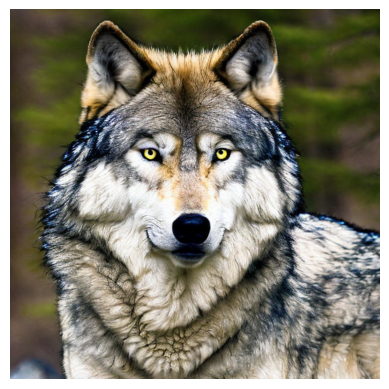

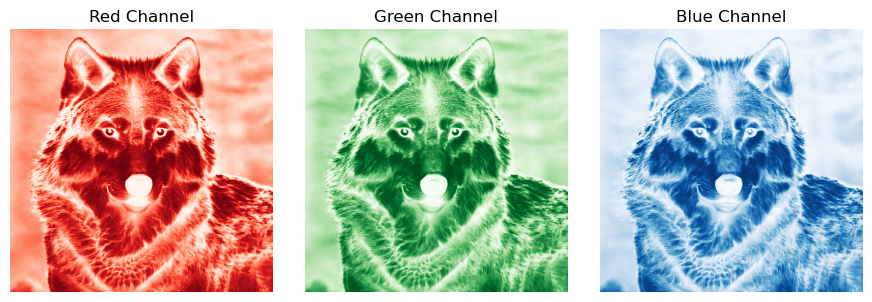

In [15]:
input_image = Image.open(DATA_PATH/'granny/timber_wolf.png')
input_data = np.array(input_image)
print(input_data.shape)

plt.imshow(input_image)
plt.axis('off')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].imshow(input_data[:,:,0], cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(input_data[:,:,1], cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(input_data[:,:,2], cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

(768, 768, 3)


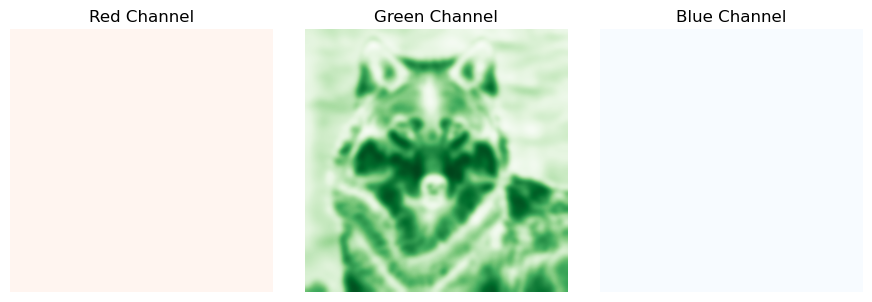

In [19]:
input_image = Image.open(DATA_PATH/'granny/timber_wolf.png')
input_data = np.array(input_image)
print(input_data.shape)

g = input_data[:, :, 1]
g += 255
g = np.clip(g, 0, 255)

input_data[:,:,0] = 0
input_data[:, :, 1] = g
input_data[:,:,2] = 0

input_data = cv2.GaussianBlur(input_data, (51,51), 0)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].imshow(input_data[:,:,0], cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(input_data[:,:,1], cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(input_data[:,:,2], cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [60]:
import requests

def query(input_data):
    response = requests.post('http://granny.advml.com/score', json={'data': input_data})
    try:
        return response.json()
    except:
        return response.text

In [63]:
input_data = np.array(Image.open(DATA_PATH/'granny/timber_wolf.png'))
img = Image.fromarray(input_data)
img_name = 'test_data/granny/timber_wolf.png'
img.save(img_name)



# img_name = DATA_PATH/'granny/timber_wolf.png'

with open(img_name, 'rb') as f:
    input_data = base64.b64encode(f.read()).decode()

query(input_data)

{'output': [[0.28360414505004883, 'timber wolf'],
  [0.1349957287311554, 'red wolf'],
  [0.12447596341371536, 'coyote'],
  [0.024048475548624992, 'dingo'],
  [0.016298510134220123, 'Eskimo dog'],
  [0.014112229458987713, 'white wolf'],
  [0.011821886524558067, 'malamute'],
  [0.00570354238152504, 'dhole'],
  [0.00557206105440855, 'Siberian husky'],
  [0.005159582011401653, 'grey fox'],
  [0.0038675684481859207, 'Norwegian elkhound'],
  [0.001737037324346602, 'red fox'],
  [0.001694007427431643, 'dogsled'],
  [0.0016618167283013463, 'kit fox'],
  [0.0015535763232037425, 'German shepherd'],
  [0.001528640277683735, 'African hunting dog'],
  [0.0015282918466255069, 'muzzle'],
  [0.0013275782112032175, 'great grey owl'],
  [0.0012897287961095572, 'bighorn'],
  [0.0012381607666611671, 'lynx'],
  [0.0011921018594875932, 'kelpie'],
  [0.001162047847174108, 'tiger'],
  [0.001141128595918417, 'impala'],
  [0.0009574173018336296, 'nematode'],
  [0.0009380985866300762, 'sea slug'],
  [0.000937359